## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Imblearn libary is used to handle imbalanced data

# Jupyter notebook
!pip install imblearn --user

!pip install imbalanced-learn --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# To help with reading and manipulation of data
import numpy as np
from numpy import array
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# To split the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# To impute missing values
from sklearn.impute import SimpleImputer

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline

# To do one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# To build a decision tree model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)
import scipy.stats as stats


# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
#mounting google colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
test = pd.read_csv('/content/drive/MyDrive/University Of Texas/Model Tuning/project/Test.csv')
train = pd.read_csv('/content/drive/MyDrive/University Of Texas/Model Tuning/project/Train.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
#Visualizing test dataset

print(test.shape)
print(test.head())

(5000, 41)
      V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -0.613 -3.820  2.202  1.300 -1.185 -4.496 -1.836  4.723  1.206 -0.342   
1  0.390 -0.512  0.527 -2.577 -1.017  2.235 -0.441 -4.406 -0.333  1.967   
2 -0.875 -0.641  4.084 -1.590  0.526 -1.958 -0.695  1.347 -1.732  0.466   
3  0.238  1.459  4.015  2.534  1.197 -3.117 -0.924  0.269  1.322  0.702   
4  5.828  2.768 -1.235  2.809 -1.642 -1.407  0.569  0.965  1.918 -2.775   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.123  1.017  4.819  3.269 -2.984  1.387  2.032 -0.512 -1.023  7.339   
1  1.797  0.410  0.638 -1.390 -1.883 -5.018 -3.827  2.418  1.762 -3.242   
2 -4.928  3.565 -0.449 -0.656 -0.167 -1.630  2.292  2.396  0.601  1.794   
3 -5.578 -0.851  2.591  0.767 -2.391 -2.342  0.572 -0.934  0.509  1.211   
4 -0.530  1.375 -0.651 -1.679 -0.379 -4.443  3.894 -0.608  2.945  0.367   

     V21   V22    V23    V24    V25    V26    V27    V28    V29    V30    V31  \
0 -2.2

In [ ]:
#Vizualizing training dataset

print(train.shape)
print(train.head())

(20000, 41)
      V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
0 -4.465 -4.679  3.102  0.506 -0.221 -2.033 -2.911  0.051 -1.522  3.762   
1  3.366  3.653  0.910 -1.368  0.332  2.359  0.733 -4.332  0.566 -0.101   
2 -3.832 -5.824  0.634 -2.419 -1.774  1.017 -2.099 -3.173 -2.082  5.393   
3  1.618  1.888  7.046 -1.147  0.083 -1.530  0.207 -2.494  0.345  2.119   
4 -0.111  3.872 -3.758 -2.983  3.793  0.545  0.205  4.849 -1.855 -6.220   

     V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
0 -5.715  0.736  0.981  1.418 -3.376 -3.047  0.306  2.914  2.270  4.395   
1  1.914 -0.951 -1.255 -2.707  0.193 -4.769 -2.205  0.908  0.757 -5.834   
2 -0.771  1.107  1.144  0.943 -3.164 -4.248 -4.039  3.689  3.311  1.059   
3 -3.053  0.460  2.705 -0.636 -0.454 -3.174 -3.404 -1.282  1.582 -1.952   
4  1.998  4.724  0.709 -1.989 -2.633  4.184  2.245  3.734 -6.313 -5.380   

     V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
0 -2.388  0

Both train and test data are all continuous data. Later will explore if there's any relationship

In [ ]:
# Checking if there's nulls values in the dataset

print(test.isnull().sum())
print("*"*30)
print(train.isnull().sum())

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64
******************************
V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36      

Both datasets have null vales at columns ```V1``` and ```V2```

In [ ]:
# Checking the data format

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

All rows are float, seems ok as the visualized data

In [ ]:
# Checking if there are duplicated lines

print(train.duplicated().sum(), test.duplicated().sum())

0 0


No duplicated rows

## Exploratory Data Analysis (EDA)

In [ ]:
#unifying the dataframes for the EDA

df = train.append(test, ignore_index=True)
print(df.shape)

(25000, 41)


### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

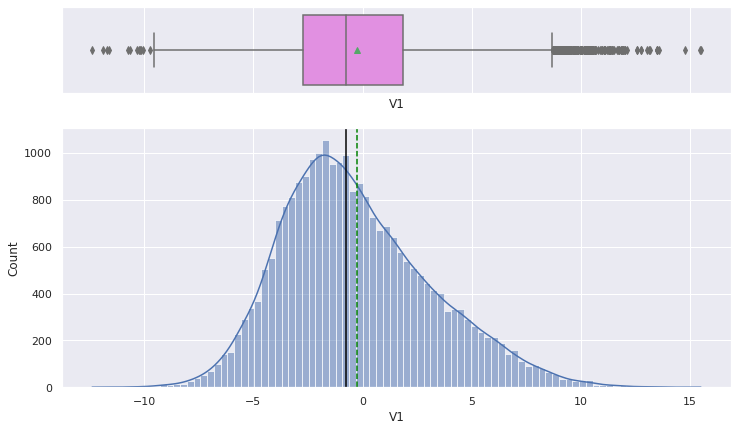

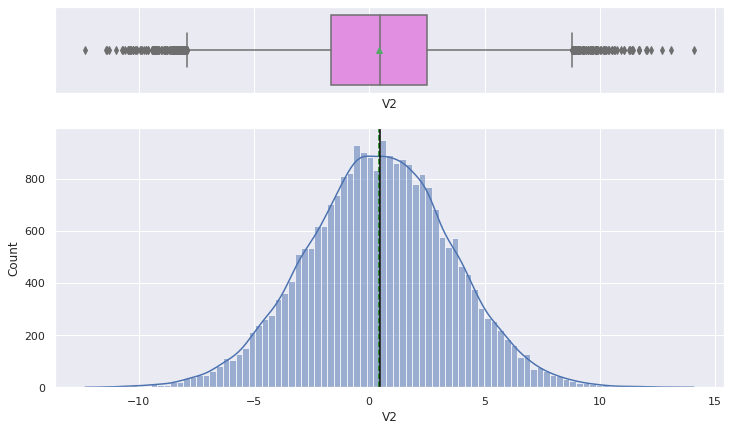

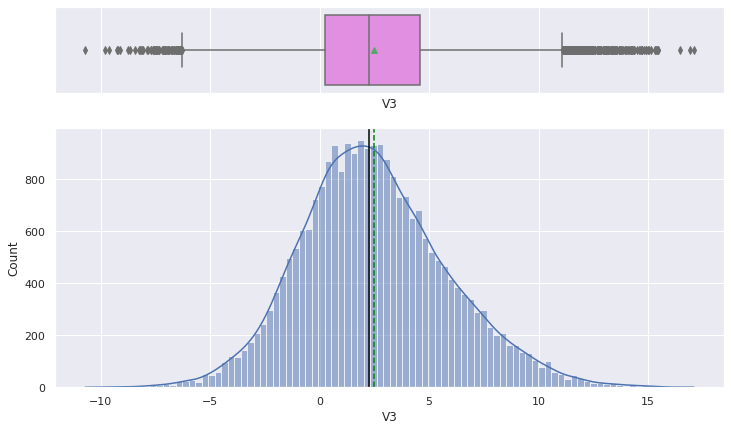

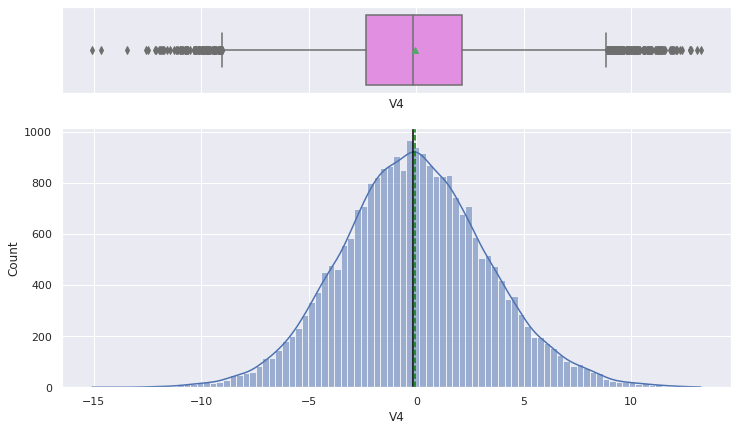

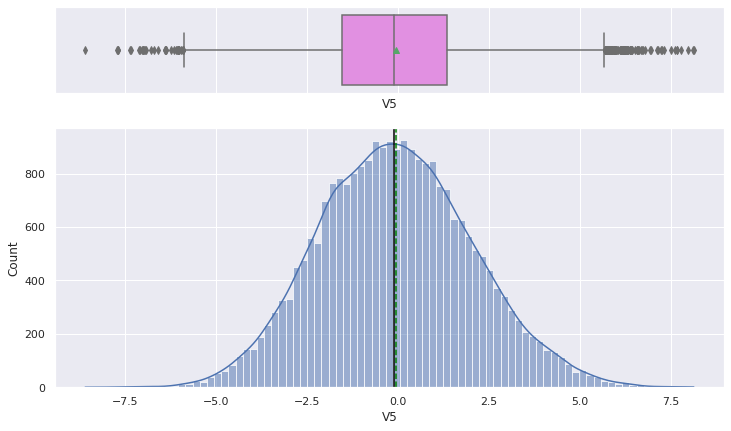

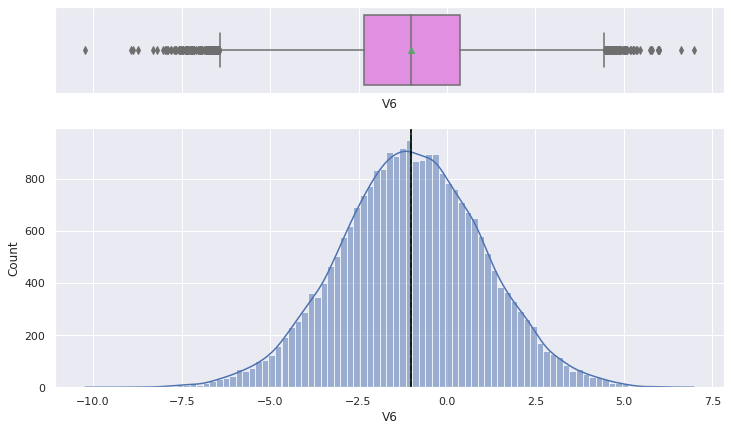

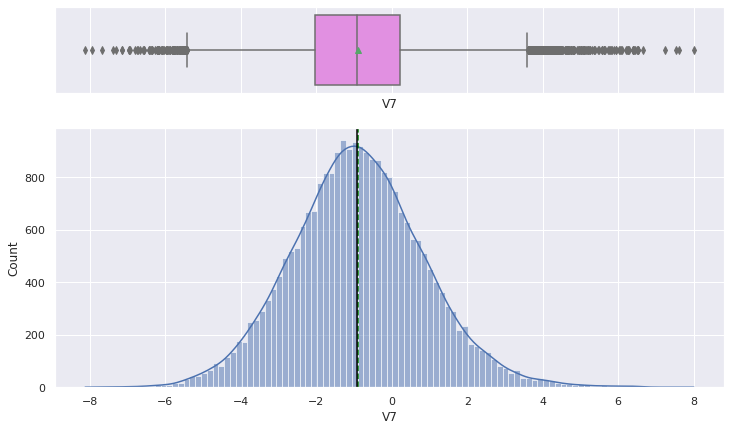

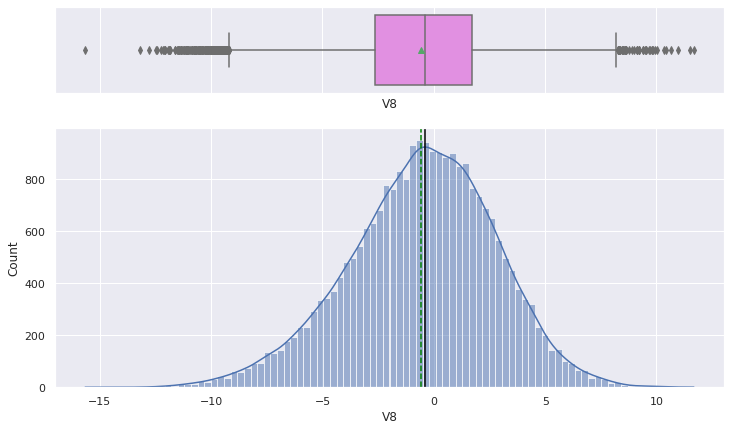

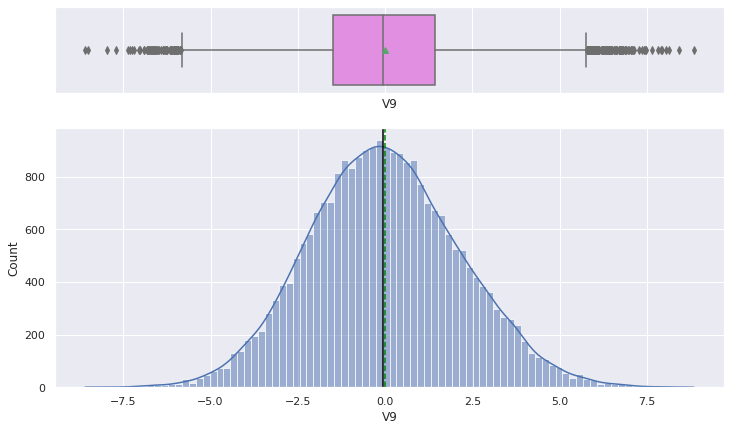

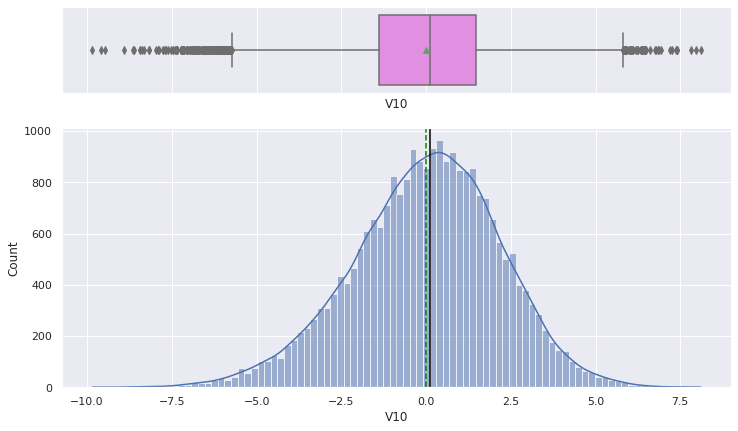

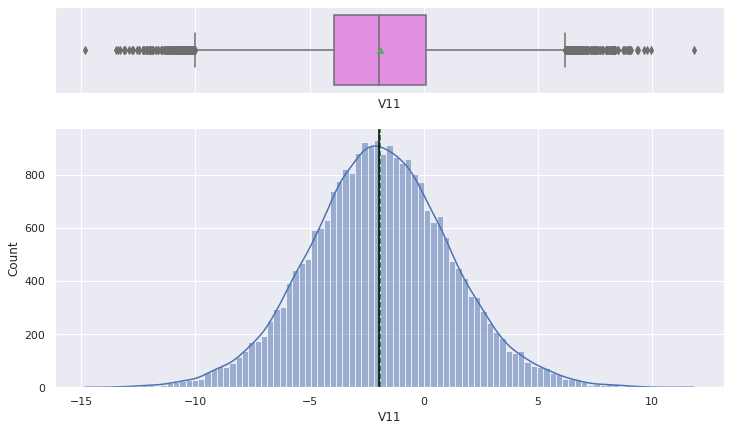

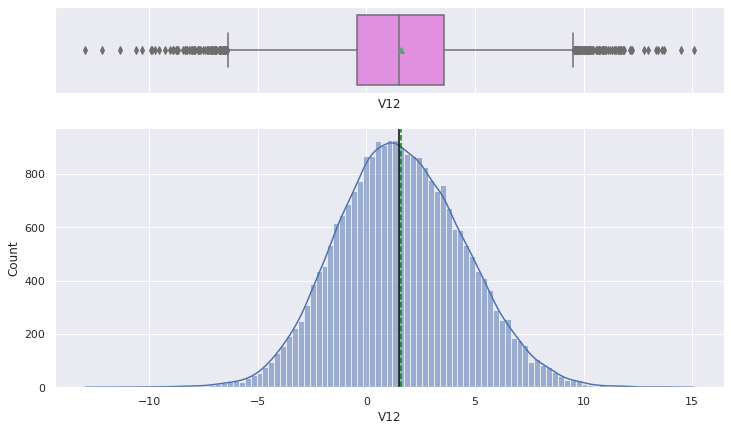

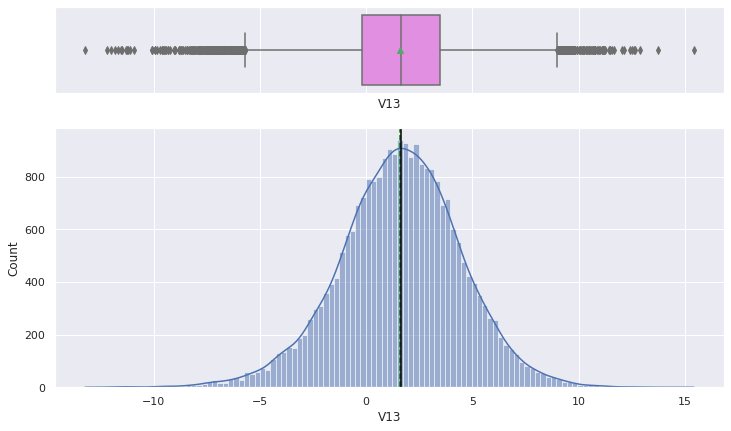

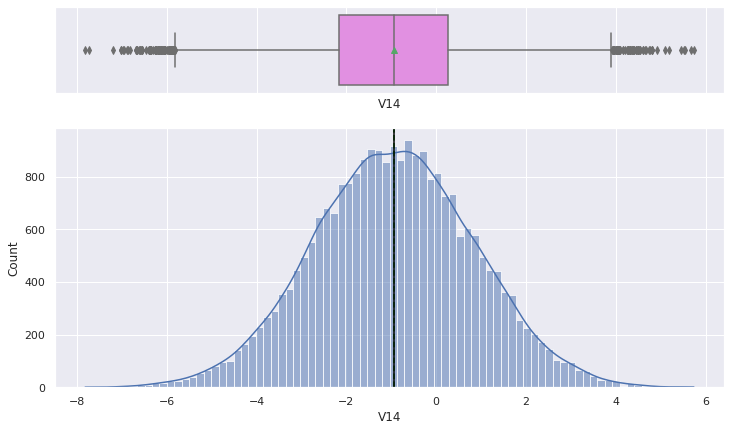

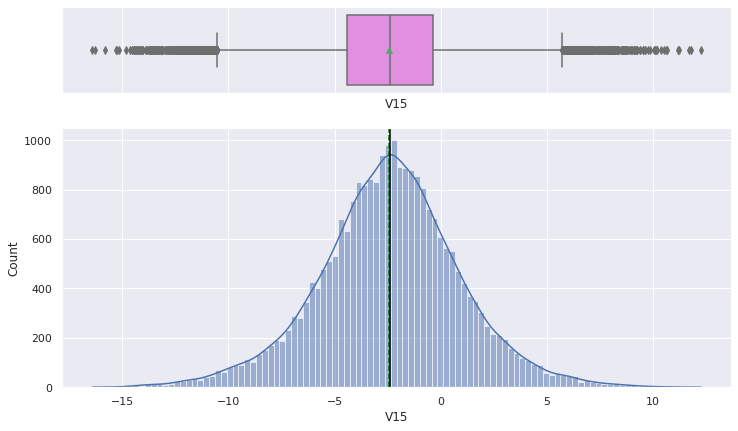

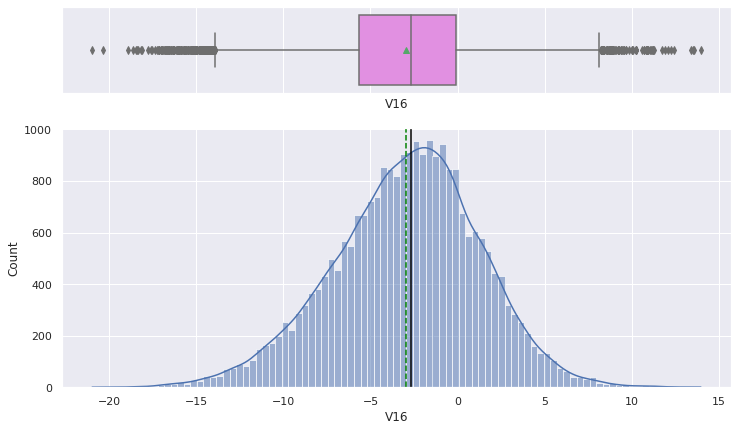

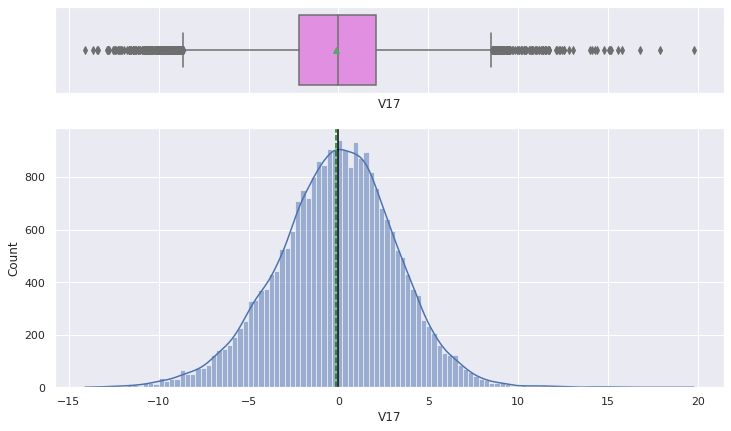

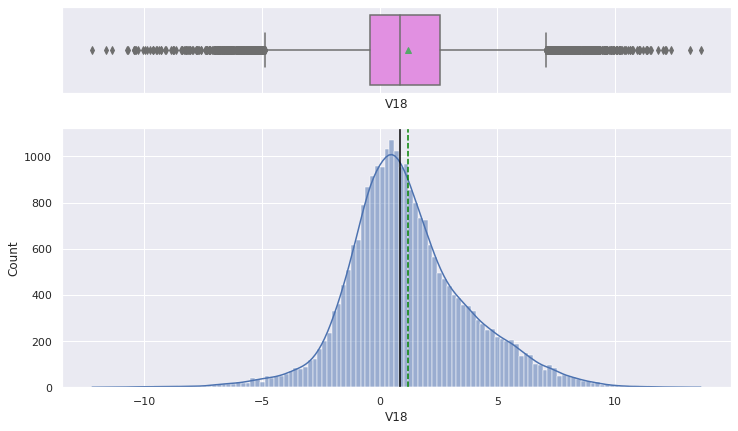

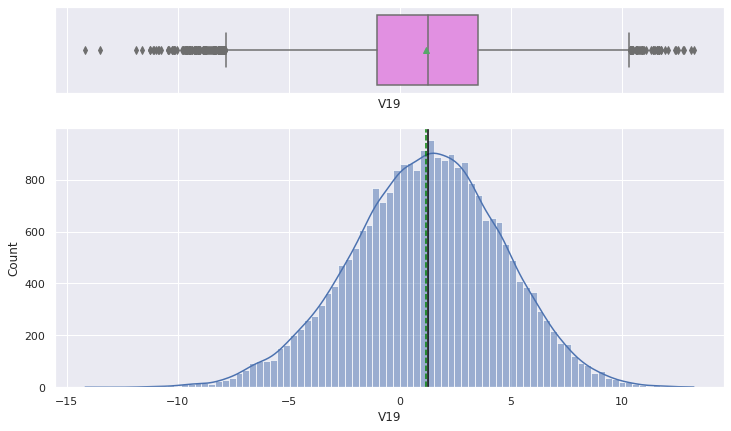

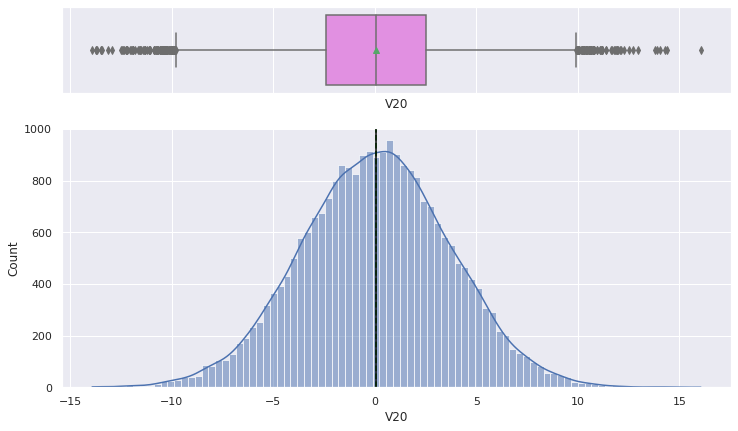

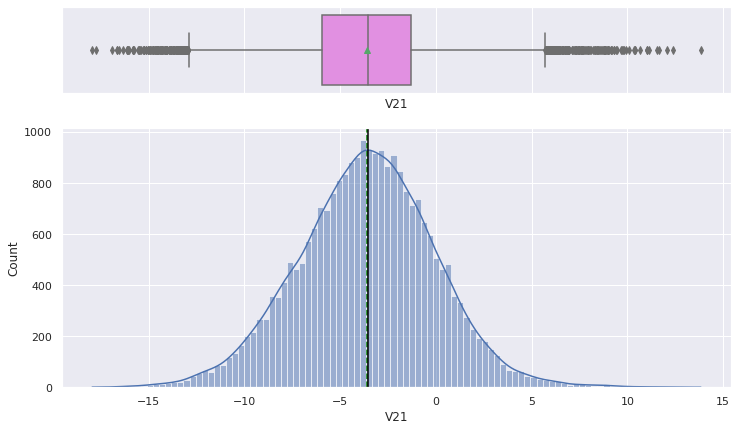

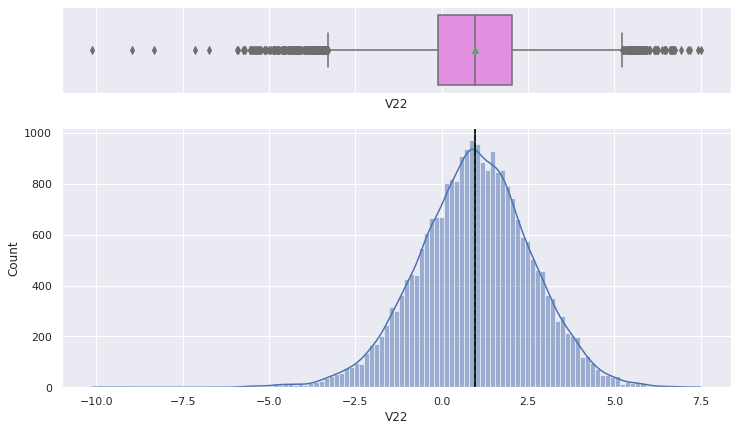

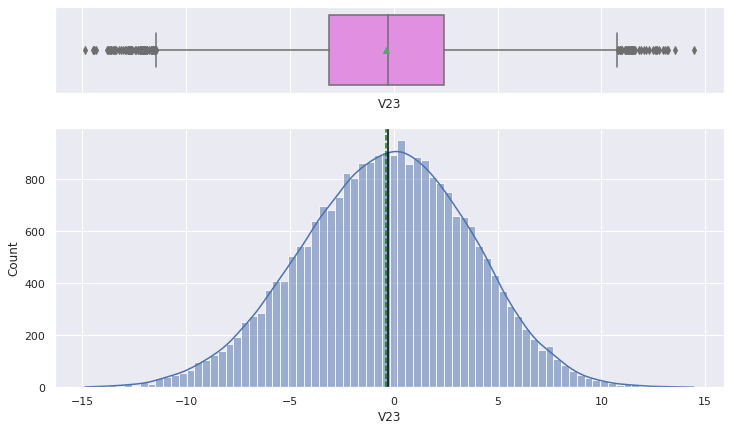

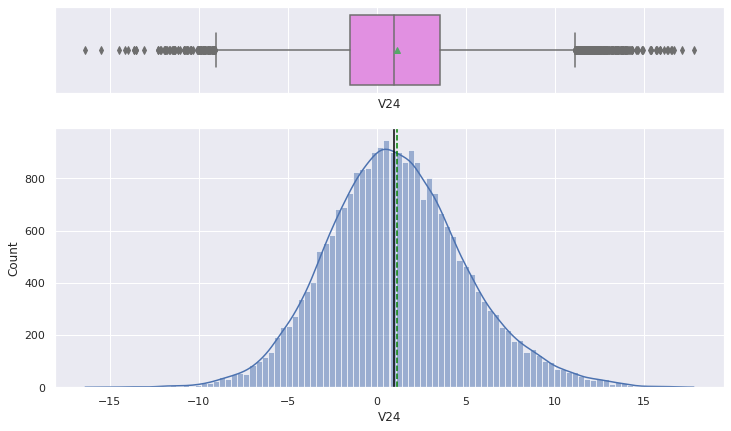

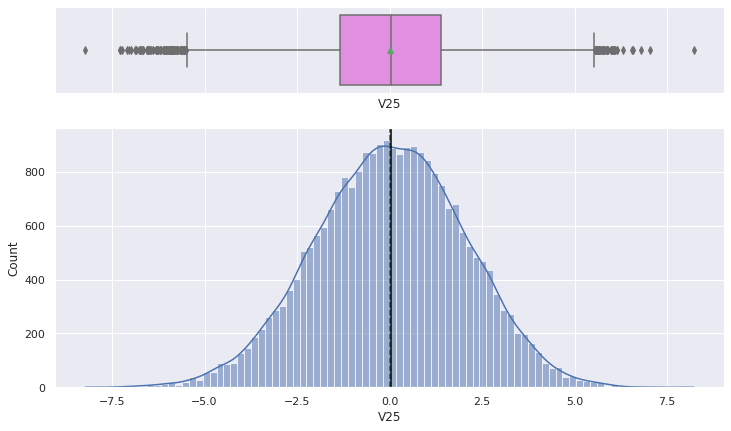

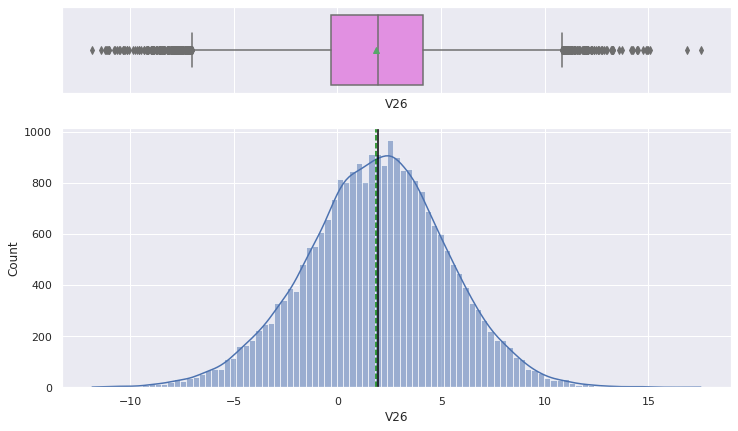

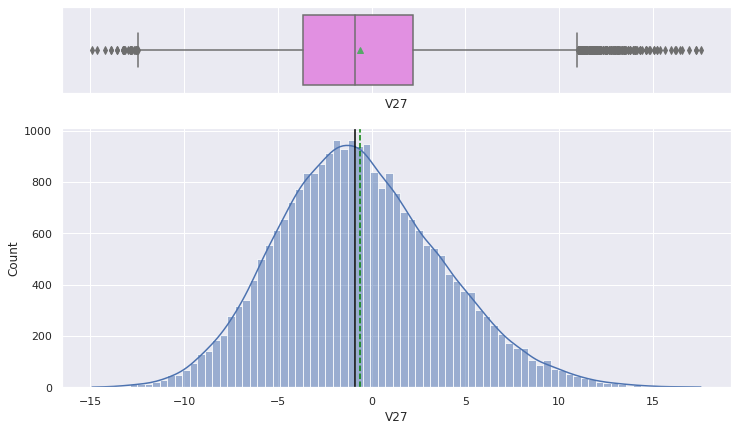

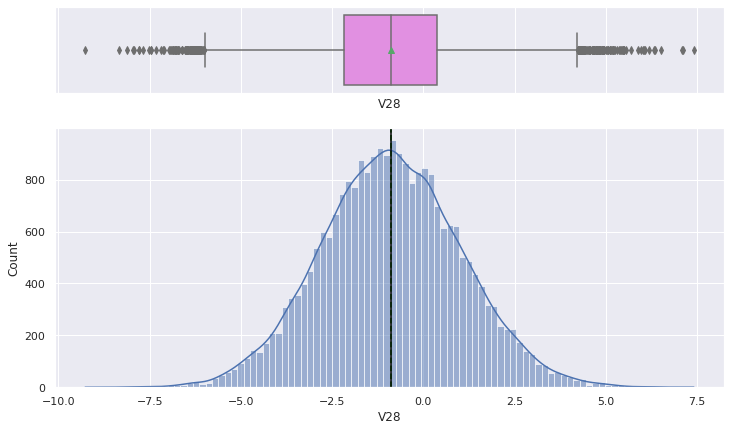

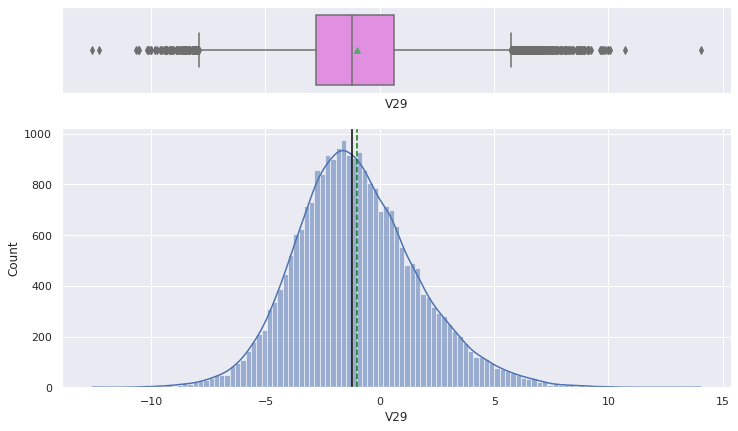

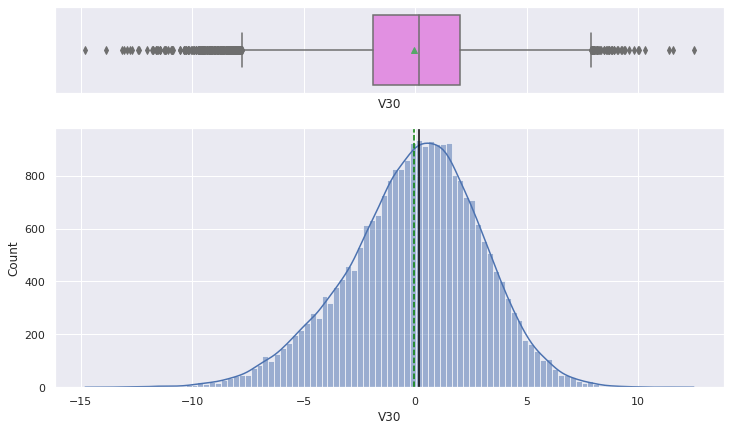

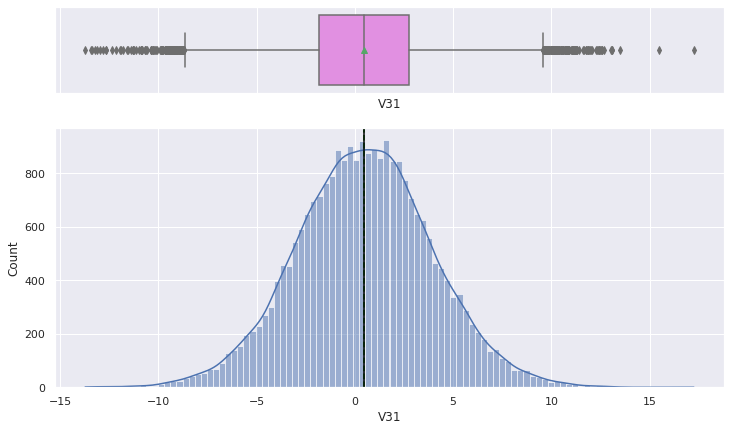

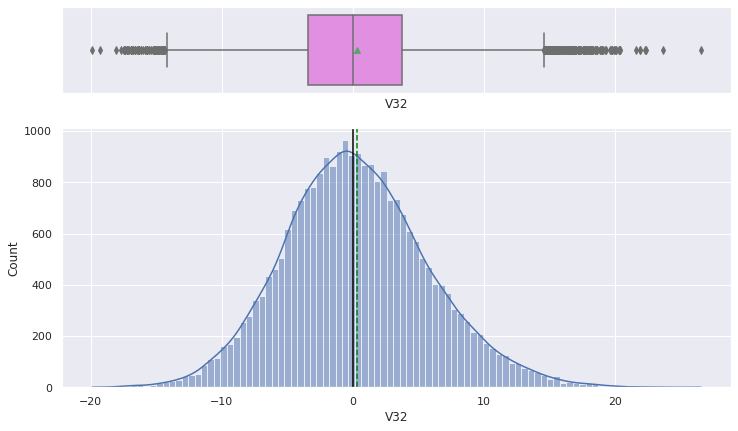

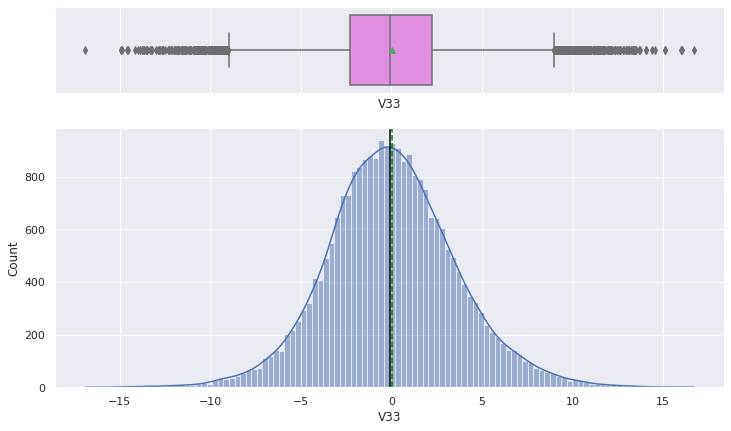

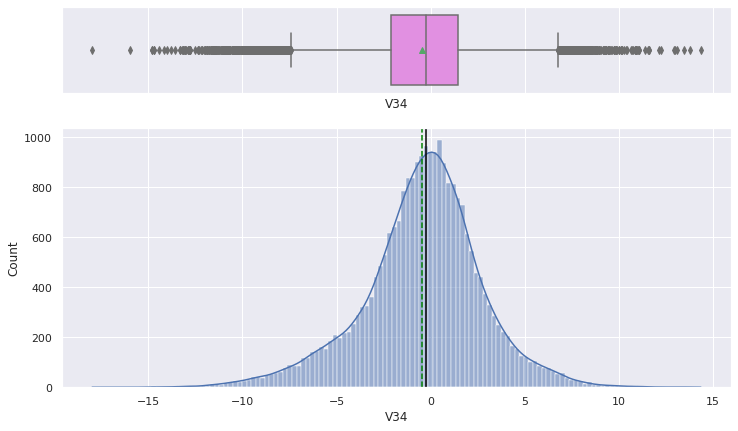

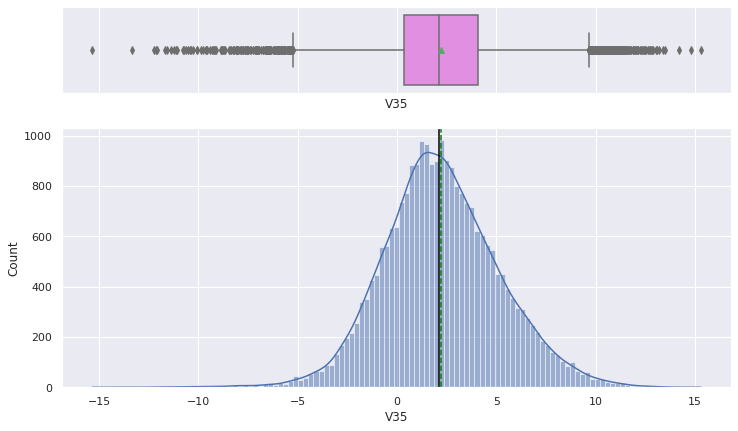

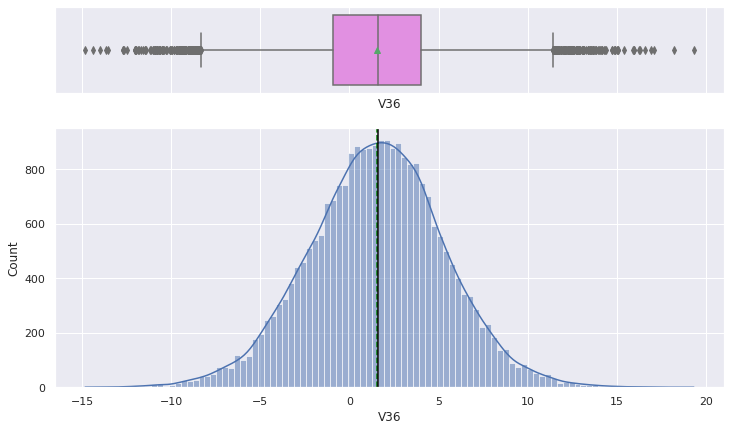

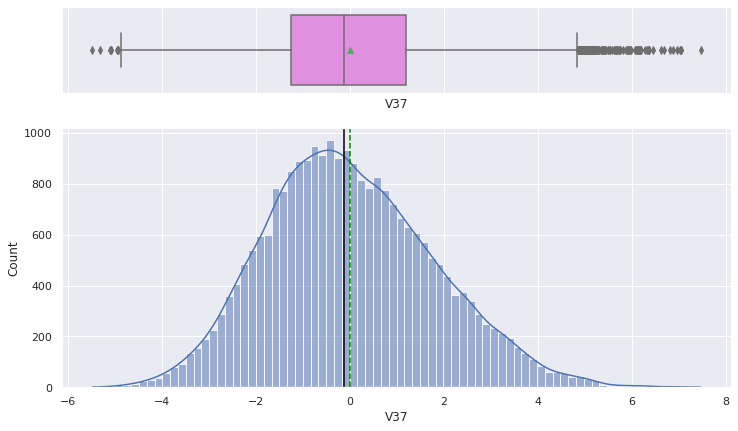

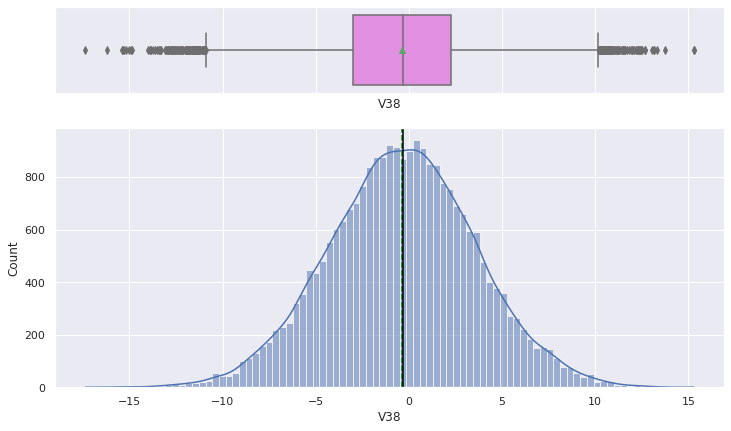

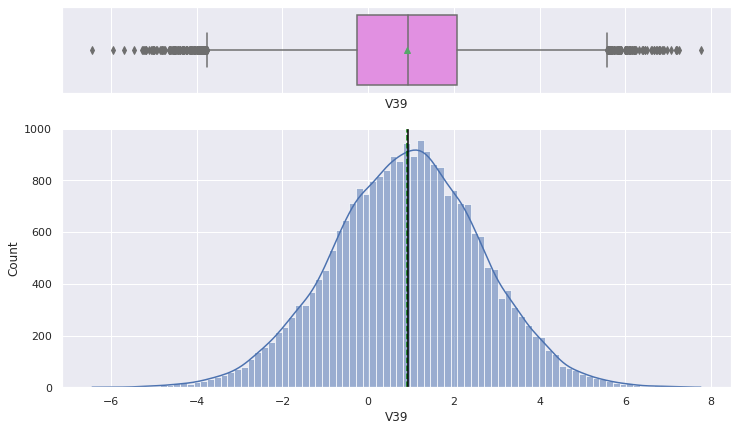

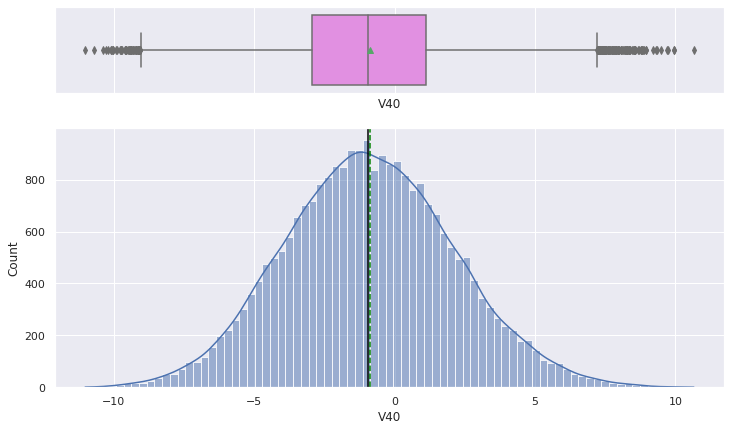

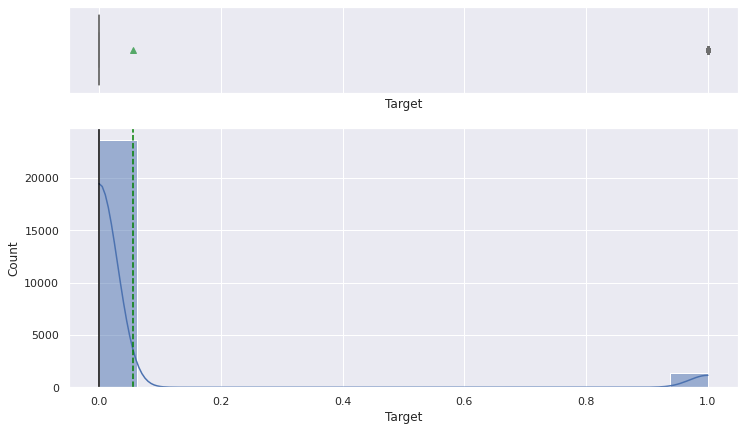

In [ ]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=True, bins=None)

Insights:

- Most of the data follows a bell shape (normal curve)
- Some of the variable have small skewness and some tail like V22, V18

In [ ]:
# Checking if this is a balanced Y variable data set

df['Target'].value_counts(normalize=True)*100

0   94.432
1    5.568
Name: Target, dtype: float64

Imbalanced dataset. 94,5% of the dataset have presented no failure

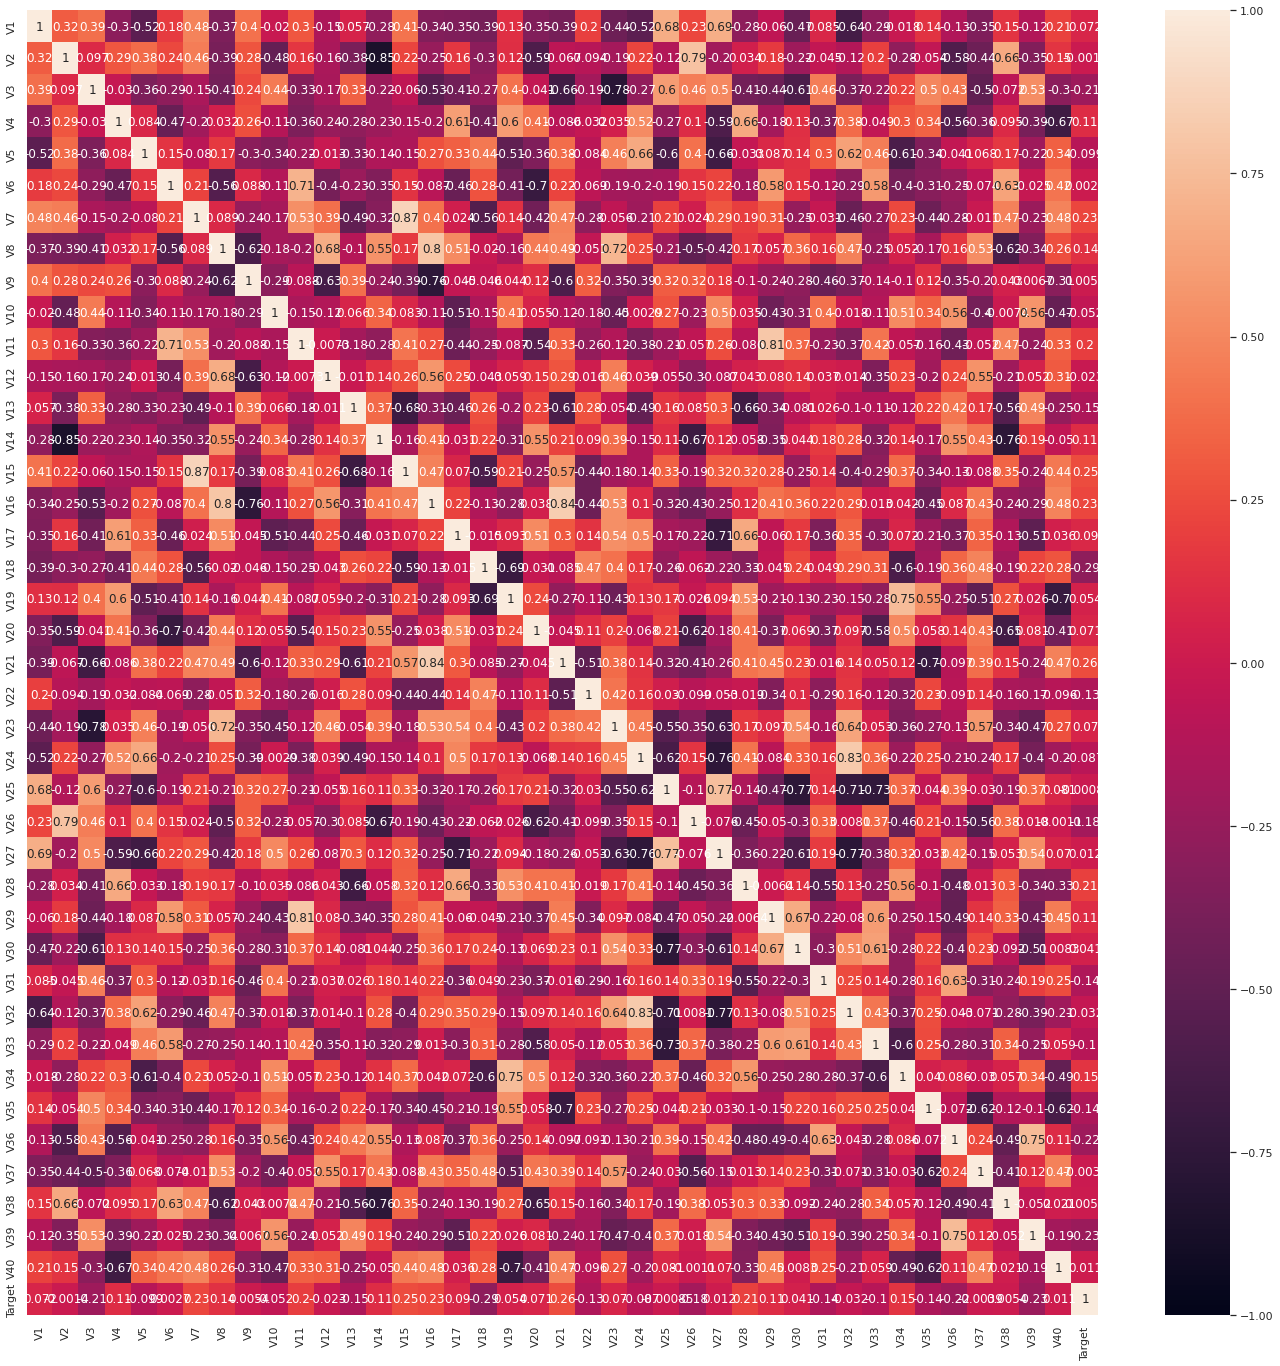

In [ ]:
# Checking if there's correlation between the data

plt.figure(figsize=(24,24))

corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, annot=True);


- There are various *dependent* features with high correlation, which indicates too much multicolinearity for regression models such as LG
- Not strong correlation to the target feature

Checking most strong correlations withing the X variable with the target variable as colors

Text(0.5, 1.0, 'V19 agains V40')

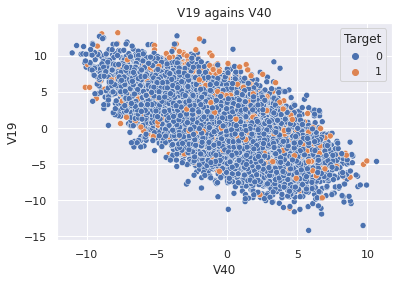

In [ ]:

sns.scatterplot(data=df, x='V40', y='V19', hue='Target');
plt.title('V19 agains V40')

Strong negative correlation with not pattern in the failures

Text(0.5, 1.0, 'V33 agains V25')

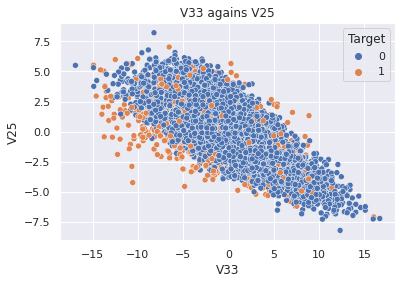

In [ ]:
sns.scatterplot(data=df, x='V33', y='V25', hue='Target');
plt.title('V33 agains V25')

Strong negative correlation with some concentration of failures at the botton left edges of the distribution

Text(0.5, 1.0, 'V29 agains V11')

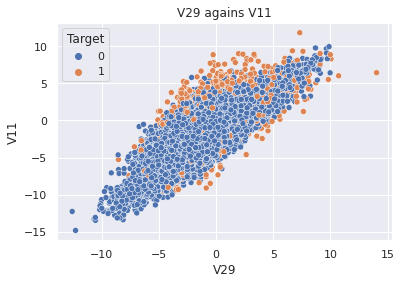

In [ ]:
sns.scatterplot(data=df, x='V29', y='V11', hue='Target');
plt.title('V29 agains V11')

Strong positive correlation with concentration of failures at the edges, specially at the top edge

Text(0.5, 1.0, 'V36 agains V39')

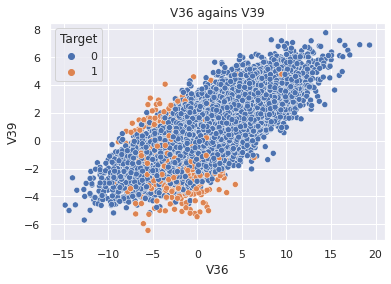

In [ ]:
sns.scatterplot(data=df, x='V36', y='V39', hue='Target');
plt.title('V36 agains V39')

Strong positive correlation with concentration of failures between -7 and 5 of x axis and -6 till 3 of y axis

## Data Pre-processing

In [ ]:
# Checking if both datasets have similar imbalance in Y feature

print(train['Target'].value_counts(normalize=True))
print(test['Target'].value_counts(normalize=True))

0   0.945
1   0.056
Name: Target, dtype: float64
0   0.944
1   0.056
Name: Target, dtype: float64


The data is stratifyed equally

In [ ]:
# separating the independent and dependent variables
X = train.drop(["Target"], axis=1)
y = train["Target"]

In [ ]:
# Spliting into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

X_test, _val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)


In [ ]:
# Creating test data sets

X_test = test.drop(["Target"], axis=1) 
y_test = test["Target"] 

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


## Missing value imputation




In [ ]:
# Let's impute the missing values
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

# fit the imputer on train data and transform the train data
X_train["V1"] = imp_median.fit_transform(X_train[["V1"]])

# transform the validation and test data using the imputer fit on train data
X_val["V1"] = imp_median.transform(X_val[["V1"]])
X_test["V1"] = imp_median.transform(X_test[["V1"]])

In [ ]:
# Let's impute the missing values
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")

# fit the imputer on train data and transform the train data
X_train["V2"] = imp_median.fit_transform(X_train[["V2"]])

# transform the validation and test data using the imputer fit on train data
X_val["V2"] = imp_median.transform(X_val[["V2"]])
X_test["V2"] = imp_median.transform(X_test[["V2"]])

In [ ]:
#Checking if all null were fullfilled

print(X_train.isnull().sum())
print("*"*80)
print(X_val.isnull().sum())
print("*"*80)
print(X_test.isnull().sum())
print("*"*80)

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
********************************************************************************
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
********************************************************************************
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V1

In [ ]:
#Checking all the Y variable proportions

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
0   0.945
1   0.056
Name: Target, dtype: float64
********************************************************************************
Target value ratio in y_train
0   0.944
1   0.056
Name: Target, dtype: float64
********************************************************************************
Target value ratio in y_val
0   0.945
1   0.055
Name: Target, dtype: float64
********************************************************************************
Target value ratio in y_test
0   0.944
1   0.056
Name: Target, dtype: float64
********************************************************************************


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Decision Tree

   Accuracy  Recall  Precision    F1
0     0.971   0.502      0.946 0.656
   Accuracy  Recall  Precision    F1
0     0.970   0.495      0.919 0.643
CPU times: user 444 ms, sys: 54.9 ms, total: 499 ms
Wall time: 435 ms


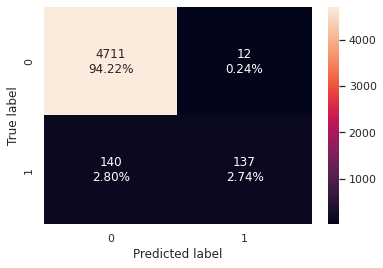

In [ ]:
%%time

#Fitting the model
dtree = DecisionTreeClassifier(random_state=1, max_depth=4)
dtree.fit(X_train, y_train)

#Calculating different metrics
dtree_model_train_perf=model_performance_classification_sklearn(dtree,X_train,y_train)
print(dtree_model_train_perf)
dtree_model_val_perf=model_performance_classification_sklearn(dtree,X_val,y_val)
print(dtree_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree,X_val,y_val)

The model has not overfited, but presents low Recall

In [ ]:
%%time

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7311954404444123

Validation Performance:

dtree: 0.7075812274368231
CPU times: user 7.66 s, sys: 10.9 ms, total: 7.67 s
Wall time: 7.71 s


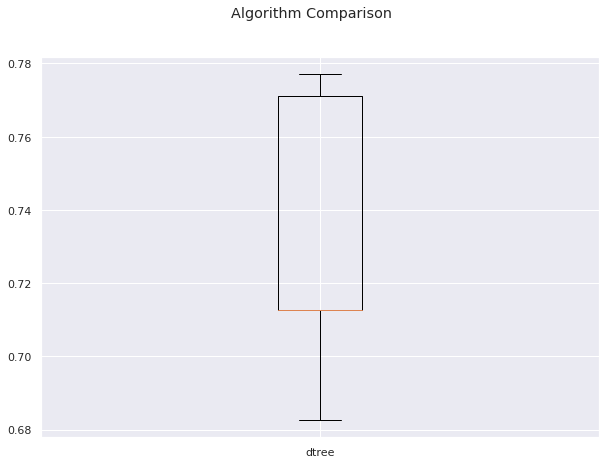

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

Random Forest

In [ ]:
%%time

# Creating and fitting the model and performance check
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

rf_model_val_perf=model_performance_classification_sklearn(rf,X_val,y_val)
print("Validation performance \n",rf_model_val_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     1.000   0.999      1.000 0.999
Validation performance 
    Accuracy  Recall  Precision    F1
0     0.985   0.736      0.990 0.845
CPU times: user 11.5 s, sys: 6.14 ms, total: 11.5 s
Wall time: 11.5 s


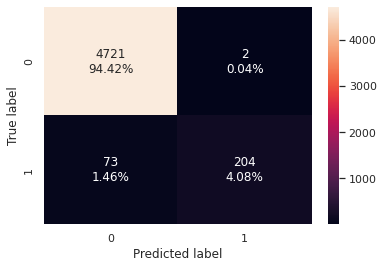

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf,X_val,y_val)

The model has overfited in Recall metric

In [ ]:
%%time

# Appending models into the list
models.append(("rf", RandomForestClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7311954404444123
rf: 0.7083832335329341

Validation Performance:

dtree: 0.7075812274368231
rf: 0.7364620938628159
CPU times: user 1min 2s, sys: 22 ms, total: 1min 2s
Wall time: 1min 2s


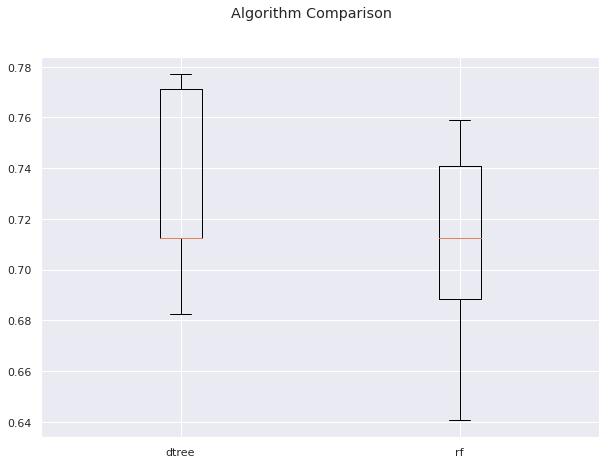

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

Bagging

In [ ]:
%%time

# Creating and fitting the model and performance check
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

bagging_model_val_perf=model_performance_classification_sklearn(bagging, X_val, y_val)
print("Validation performance \n",bagging_model_val_perf)

Training performance 
    Accuracy  Recall  Precision    F1
0     0.998   0.960      0.999 0.979
Validation performance 
    Accuracy  Recall  Precision    F1
0     0.983   0.715      0.966 0.822
CPU times: user 9.29 s, sys: 7.22 ms, total: 9.3 s
Wall time: 9.3 s


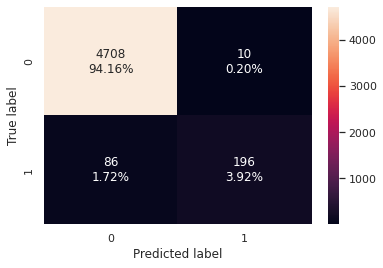

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging, X_test, y_test)

The model has overfited in Recall metric

In [ ]:
%%time

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7311954404444123
rf: 0.7083832335329341
Bagging: 0.6963566842219177

Validation Performance:

dtree: 0.7075812274368231
rf: 0.7364620938628159
Bagging: 0.7148014440433214
CPU times: user 1min 45s, sys: 46.2 ms, total: 1min 45s
Wall time: 1min 45s


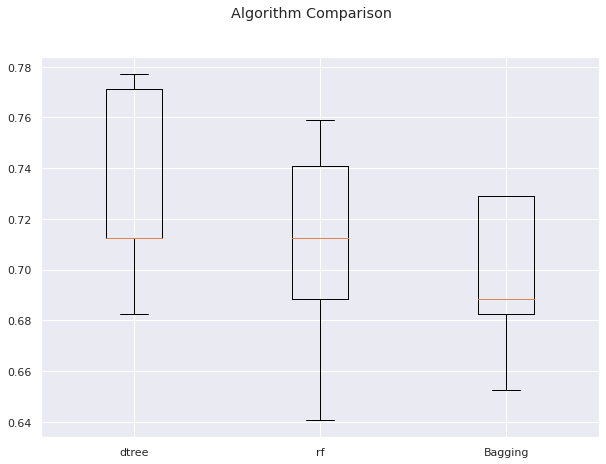

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

AdaBoost

In [ ]:
%%time

# Creating and fitting the model and performance check
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)


ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_val_perf=model_performance_classification_sklearn(ab_classifier,X_val,y_val)
print(ab_classifier_model_val_perf)

   Accuracy  Recall  Precision    F1
0     0.978   0.670      0.900 0.768
   Accuracy  Recall  Precision    F1
0     0.976   0.632      0.907 0.745
CPU times: user 4.32 s, sys: 11.8 ms, total: 4.33 s
Wall time: 4.34 s


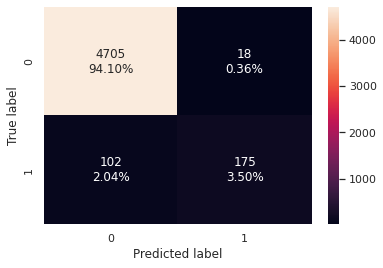

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_val,y_val)

The model present low Recall score

In [ ]:
%%time

# Appending models into the list
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7311954404444123
rf: 0.7083832335329341
Bagging: 0.6963566842219177
AdaBoost: 0.607560782050357

Validation Performance:

dtree: 0.7075812274368231
rf: 0.7364620938628159
Bagging: 0.7148014440433214
AdaBoost: 0.631768953068592
CPU times: user 2min 5s, sys: 108 ms, total: 2min 5s
Wall time: 2min 5s


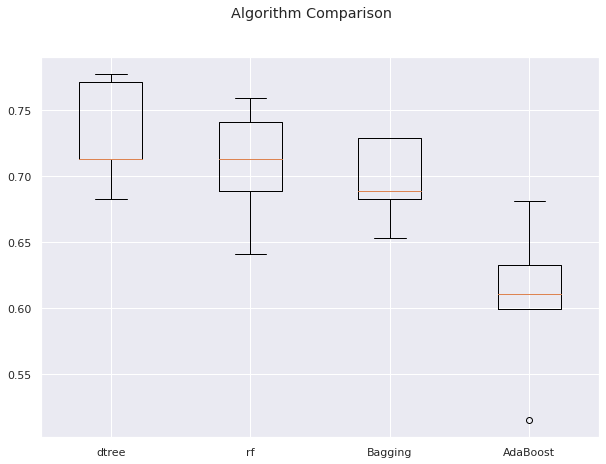

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

Gradient Boost

Training performance:
    Accuracy  Recall  Precision    F1
0     0.989   0.821      0.986 0.896
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.982   0.708      0.961 0.815
CPU times: user 20.4 s, sys: 75.3 ms, total: 20.5 s
Wall time: 20.4 s


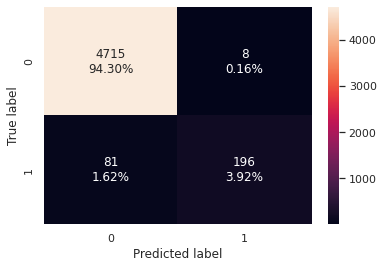

In [ ]:
%%time

# Creating and fitting the model and performance check
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_val_perf=model_performance_classification_sklearn(gb_classifier,X_val,y_val)
print("Validation performance:\n",gb_classifier_model_val_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_val,y_val)

The model seems to have Recall overfited, therefore presents low Recall score in validation set

In [ ]:
%%time

# Appending models into the list
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7311954404444123
rf: 0.7083832335329341
Bagging: 0.6963566842219177
AdaBoost: 0.607560782050357
GradientBoost: 0.7143568285116514

Validation Performance:

dtree: 0.7075812274368231
rf: 0.7364620938628159
Bagging: 0.7148014440433214
AdaBoost: 0.631768953068592
GradientBoost: 0.7075812274368231
CPU times: user 3min 43s, sys: 128 ms, total: 3min 43s
Wall time: 3min 43s


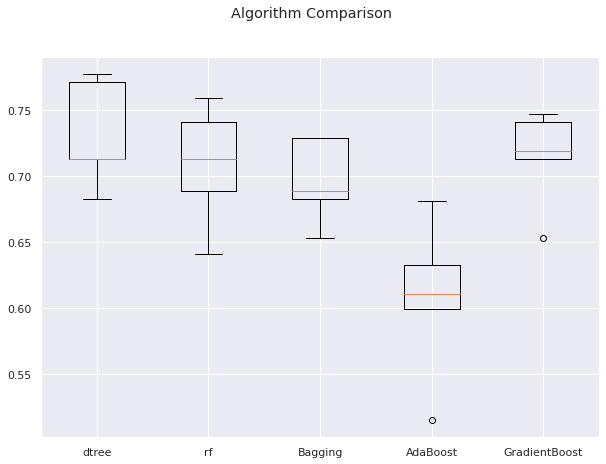

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

XGB

In [ ]:
%%time

#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_val_perf=model_performance_classification_sklearn(xgb_classifier,X_val,y_val)
print("Validation performance:\n",xgb_classifier_model_val_perf)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.989   0.815      0.990 0.894
Validation performance:
    Accuracy  Recall  Precision    F1
0     0.985   0.747      0.976 0.847
CPU times: user 2.85 s, sys: 18.2 ms, total: 2.87 s
Wall time: 2.95 s


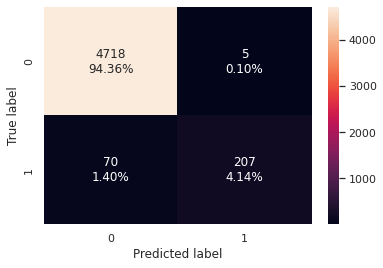

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_val,y_val)

In [ ]:
%%time

# Appending models into the list
models.append(("XGB", XGBClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7311954404444123
rf: 0.7083832335329341
Bagging: 0.6963566842219177
AdaBoost: 0.607560782050357
GradientBoost: 0.7143568285116514
XGB: 0.7372123223432654

Validation Performance:

dtree: 0.7075812274368231
rf: 0.7364620938628159
Bagging: 0.7148014440433214
AdaBoost: 0.631768953068592
GradientBoost: 0.7075812274368231
XGB: 0.7472924187725631
CPU times: user 3min 57s, sys: 174 ms, total: 3min 58s
Wall time: 3min 57s


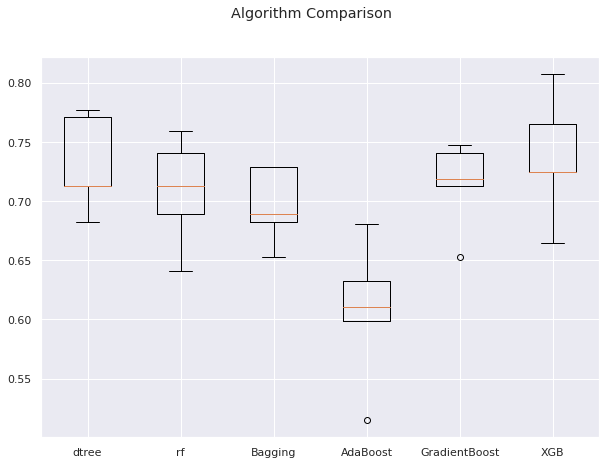

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

Looking only at the training scores XGB seems more robust model with higher scores

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 833
Before OverSampling, count of label '0': 14167 

After OverSampling, count of label '1': 14167
After OverSampling, count of label '0': 14167 

After OverSampling, the shape of train_X: (28334, 40)
After OverSampling, the shape of train_y: (28334,) 



Decision Tree Oversampled

In [ ]:
%%time

dtree_oversample = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with oversampled training set
dtree_oversample.fit(X_train_over, y_train_over)

CPU times: user 595 ms, sys: 27.2 ms, total: 622 ms
Wall time: 600 ms


DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = dtree_oversample.predict(X_train_over)
pred_val = dtree_oversample.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.8771087739112021
0.8231046931407943


In [ ]:
# Checking recall score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_over, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_over, pred_train))
print(f1_score(y_val, pred_val))

0.8963789087315592
0.9092
0.9122678217458337
0.36018957345971564
0.8943428818194904
0.5010989010989011


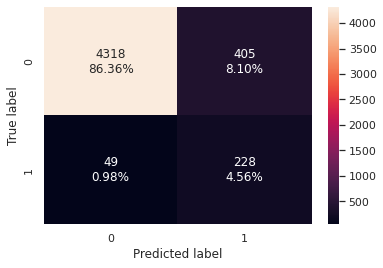

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(dtree_oversample,X_val,y_val)

Model presents good Recall score but overfited in Precision

Random Forest Oversampled

In [ ]:
%%time

# Creating and fitting the model
rf_oversampled = RandomForestClassifier(random_state=1)
rf_oversampled.fit(X_train_over, y_train_over)

CPU times: user 15.7 s, sys: 12.5 ms, total: 15.7 s
Wall time: 15.6 s


RandomForestClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = rf_oversampled.predict(X_train_over)
pred_val = rf_oversampled.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

1.0
0.8447653429602888


In [ ]:
# Checking recall score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_over, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_over, pred_train))
print(f1_score(y_val, pred_val))

1.0
0.9886
1.0
0.9435483870967742
1.0
0.8914285714285715


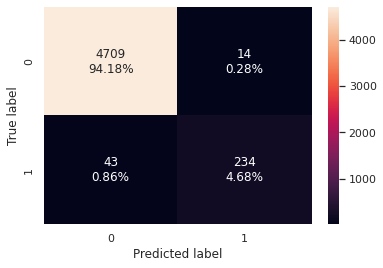

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_oversampled,X_val,y_val)

Model has overfited in training data

Bagging Oversampled

In [ ]:
%%time

# Creating and fitting the model
bagging_oversampled = BaggingClassifier(random_state=1)
bagging_oversampled.fit(X_train_over, y_train_over)

CPU times: user 11.4 s, sys: 16.1 ms, total: 11.4 s
Wall time: 11.4 s


BaggingClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = bagging_oversampled.predict(X_train_over)
pred_val = bagging_oversampled.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.998447095362462
0.8122743682310469


In [ ]:
# Checking recall score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_over, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_over, pred_train))
print(f1_score(y_val, pred_val))

0.9991176678195807
0.98
0.9997879558948262
0.8241758241758241
0.9991170757549003
0.8181818181818182


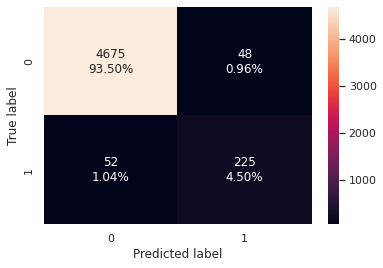

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_oversampled,X_val,y_val)

Good model, strong Recal Score and good balance with Precision resulting into a good F1 Score. Risky model though, presents strong signs of overfitting

AdaBoost Oversampled

In [ ]:
%%time

# Creating and fitting the model
ab_classifier_oversampled = AdaBoostClassifier(random_state=1)
ab_classifier_oversampled.fit(X_train_over, y_train_over)

CPU times: user 8.23 s, sys: 4.05 ms, total: 8.23 s
Wall time: 8.21 s


AdaBoostClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = ab_classifier_oversampled.predict(X_train_over)
pred_val = ab_classifier_oversampled.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.9011787957930402
0.8483754512635379


In [ ]:
# Checking recall score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_over, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_over, pred_train))
print(f1_score(y_val, pred_val))

0.90784922707701
0.9094
0.913363857490342
0.3637770897832817
0.9072304139278735
0.5092091007583965


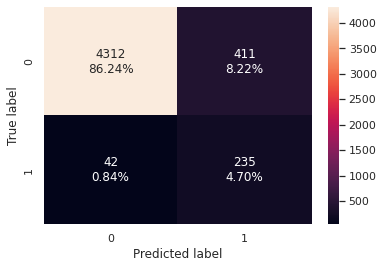

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_oversampled,X_val,y_val)

Model presents good Recall score but overfited in Precision

GradientBoost Oversampled

In [ ]:
#Creating and fitting the model

%%time

gb_classifier_oversampled = GradientBoostingClassifier(random_state=1)
gb_classifier_oversampled.fit(X_train_over, y_train_over)

CPU times: user 40.5 s, sys: 28.7 ms, total: 40.5 s
Wall time: 40.5 s


GradientBoostingClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = gb_classifier_oversampled.predict(X_train_over)
pred_val = gb_classifier_oversampled.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.9300487047363591
0.8808664259927798


In [ ]:
# Checking recall score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_over, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_over, pred_train))
print(f1_score(y_val, pred_val))

0.9523893555445754
0.9652
0.9735481010787645
0.6337662337662338
0.9513013970614778
0.7371601208459215


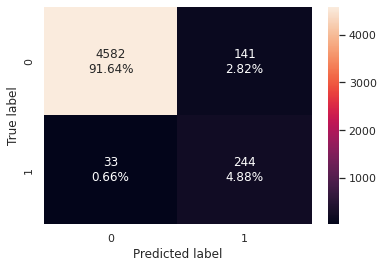

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier_oversampled,X_val,y_val)

Model presents good Recall score but overfited in Precision

XGB Oversampled

In [ ]:
%%time

#Fitting the model
xgb_classifier_oversampled = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier_oversampled.fit(X_train_over, y_train_over)

CPU times: user 5.52 s, sys: 18.5 ms, total: 5.54 s
Wall time: 5.54 s


XGBClassifier(eval_metric='logloss', random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = xgb_classifier_oversampled.predict(X_train_over)
pred_val = xgb_classifier_oversampled.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_over, pred_train))
print(recall_score(y_val, pred_val))

0.9248958848027106
0.8736462093862816


In [ ]:
# Checking recall score on oversampled train and validation set
print(accuracy_score(y_train_over, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_over, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_over, pred_train))
print(f1_score(y_val, pred_val))

0.9491776664078492
0.9648
0.9721047555456637
0.6318537859007833
0.9479128987918687
0.7333333333333334


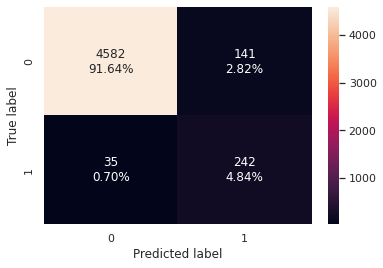

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_oversampled,X_val,y_val)

Model presents good Recall score but overfited in Precision

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
#Checking the effect of undersampling

print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 833
Before Under Sampling, count of label '0': 14167 

After Under Sampling, count of label '1': 833
After Under Sampling, count of label '0': 833 

After Under Sampling, the shape of train_X: (1666, 40)
After Under Sampling, the shape of train_y: (1666,) 



Decision Tree Undersampled

In [ ]:
%%time

# Creating and fitting the model
dtree_undersampled = DecisionTreeClassifier(random_state=1, max_depth=4)

# training the decision tree model with undersampled training set
dtree_undersampled.fit(X_train_un, y_train_un)

CPU times: user 32.9 ms, sys: 8 µs, total: 32.9 ms
Wall time: 32.1 ms


DecisionTreeClassifier(max_depth=4, random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = dtree_undersampled.predict(X_train_un)
pred_val = dtree_undersampled.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

0.8715486194477791
0.8122743682310469


In [ ]:
# Checking accuracy score on undersampled train and validation set
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_un, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_un, pred_train))
print(f1_score(y_val, pred_val))

0.9003601440576231
0.891
0.9248407643312102
0.31337047353760444
0.8974042027194067
0.45226130653266333


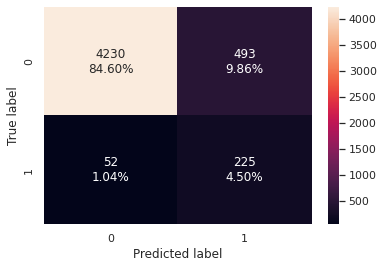

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(dtree_undersampled,X_val,y_val)

The model is too imbalanced when it comes to F1 score. Recall is good, but precision has overfited

Random Forest Undersampled

In [ ]:
%%time

# Creating and fitting the model
rf_undersampled = RandomForestClassifier(random_state=1)
rf_undersampled.fit(X_train_un, y_train_un)

CPU times: user 637 ms, sys: 1.92 ms, total: 639 ms
Wall time: 638 ms


RandomForestClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = rf_undersampled.predict(X_train_un)
pred_val = rf_undersampled.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

1.0
0.8808664259927798


In [ ]:
# Checking accuracy score on undersampled train and validation set
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_un, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_un, pred_train))
print(f1_score(y_val, pred_val))

1.0
0.9526
1.0
0.5446428571428571
1.0
0.6731034482758621


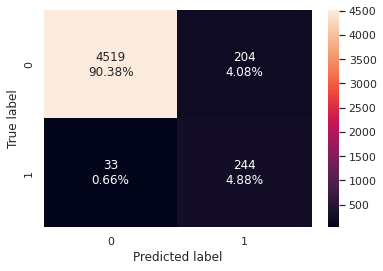

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_undersampled,X_val,y_val)

The model has overfited

Bagging Undersampled

In [ ]:
%%time

bagging_undersampled = BaggingClassifier(random_state=1)
bagging_undersampled.fit(X_train_un, y_train_un)

CPU times: user 422 ms, sys: 0 ns, total: 422 ms
Wall time: 425 ms


BaggingClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = bagging_undersampled.predict(X_train_un)
pred_val = bagging_undersampled.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

0.9831932773109243
0.8736462093862816


In [ ]:
# Checking accuracy score on undersampled train and validation set
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_un, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_un, pred_train))
print(f1_score(y_val, pred_val))

0.9903961584633854
0.9302
0.997563946406821
0.4352517985611511
0.9903264812575574
0.5810324129651862


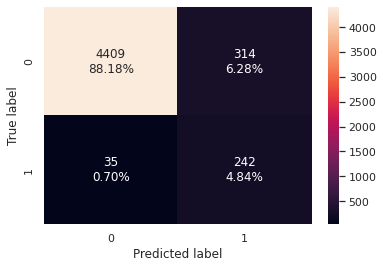

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_undersampled,X_val,y_val)

The model is too imbalanced when it comes to F1 score. Recall is good, but precision has overfited

AdaBoost Undersampled

In [ ]:
%%time

# Creating and fitting the model
ab_classifier_undersampled = AdaBoostClassifier(random_state=1)
ab_classifier_undersampled.fit(X_train_un, y_train_un)

CPU times: user 452 ms, sys: 5.85 ms, total: 458 ms
Wall time: 469 ms


AdaBoostClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = ab_classifier_undersampled.predict(X_train_un)
pred_val = ab_classifier_undersampled.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

0.8991596638655462
0.8736462093862816


In [ ]:
# Checking accuracy score on undersampled train and validation set
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_un, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_un, pred_train))
print(f1_score(y_val, pred_val))

0.9147659063625451
0.8722
0.9281288723667905
0.2860520094562648
0.9134146341463415
0.4309884238646483


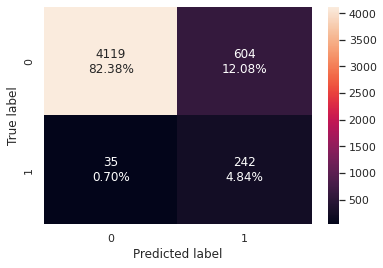

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier_undersampled,X_val,y_val)

The model is too imbalanced when it comes to F1 score. Recall is good, but precision has overfited

GradientBoost Undersampled

In [ ]:
%%time

# Creating and fitting the model
gb_classifier_undersampled = GradientBoostingClassifier(random_state=1)
gb_classifier_undersampled.fit(X_train_un, y_train_un)

CPU times: user 1.75 s, sys: 4.62 ms, total: 1.76 s
Wall time: 1.76 s


GradientBoostingClassifier(random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = gb_classifier_undersampled.predict(X_train_un)
pred_val = gb_classifier_undersampled.predict(X_val)

In [ ]:
# Checking recall score on oversampled train and validation set
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

0.9399759903961584
0.8772563176895307


In [ ]:
# Checking accuracy score on undersampled train and validation set
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_un, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_un, pred_train))
print(f1_score(y_val, pred_val))

0.9645858343337335
0.9318
0.9886363636363636
0.44181818181818183
0.9636923076923076
0.5876662636033858


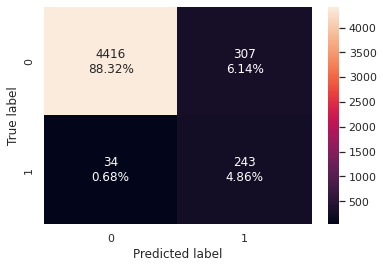

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier_undersampled,X_val,y_val)

The model is too imbalanced when it comes to F1 score. Recall is good, but precision is too low

XGB Undersampled

In [ ]:
%%time

#Fitting the model
xgb_classifier_undersampled = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier_undersampled.fit(X_train_un, y_train_un)

CPU times: user 338 ms, sys: 1.94 ms, total: 340 ms
Wall time: 344 ms


XGBClassifier(eval_metric='logloss', random_state=1)

In [ ]:
# Predicting the target for train and validation set
pred_train = xgb_classifier_undersampled.predict(X_train_un)
pred_val = xgb_classifier_undersampled.predict(X_val)

In [ ]:
# Checking Recall score on undersampled train and validation set
print(recall_score(y_train_un, pred_train))
print(recall_score(y_val, pred_val))

0.921968787515006
0.8700361010830325


In [ ]:
# Checking accuracy score on undersampled train and validation set
print(accuracy_score(y_train_un, pred_train))
print(accuracy_score(y_val, pred_val))

print(precision_score(y_train_un, pred_train))
print(precision_score(y_val, pred_val))

print(f1_score(y_train_un, pred_train))
print(f1_score(y_val, pred_val))

0.9555822328931572
0.941
0.9884169884169884
0.482
0.9540372670807453
0.6203346203346203


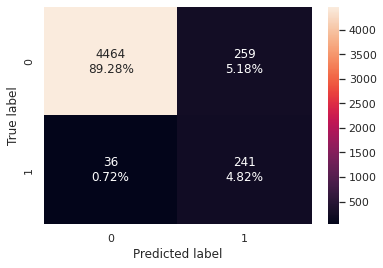

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier_undersampled,X_val,y_val)

The model is too imbalanced when it comes to F1 score. Recall is good, but precision has overfited

I'll use ```Decision Tree```, ```Random Forest```, ```Bagging``` and ```Gradient Boost```

I'd use XGB if it didn't take too long for tunning with cross validation

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

## Sample tuning models

###Decision Tree

In [ ]:
%%time

# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5245436837169035:
CPU times: user 687 ms, sys: 130 ms, total: 817 ms
Wall time: 9.01 s


In [ ]:
%%time

# building model with best parameters
dt_tuned = DecisionTreeClassifier(
     max_depth= 5,
    min_samples_leaf= 7,
    max_leaf_nodes= 15,
    min_impurity_decrease= 0.0001,
)

# Fit the model on training data
dt_tuned.fit(X_train, y_train)

CPU times: user 386 ms, sys: 0 ns, total: 386 ms
Wall time: 385 ms


DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
## To check the performance on training set
dt_random_train = model_performance_classification_sklearn(
    dt_tuned, X_train, y_train
)
dt_random_train

,Accuracy,Recall,Precision,F1
0,0.972,0.598,0.859,0.705


In [ ]:
## To check the performance on validation set
dt_random_val = model_performance_classification_sklearn(
    dt_tuned, X_val, y_val
)
dt_random_val

,Accuracy,Recall,Precision,F1
0,0.972,0.588,0.858,0.698


Recall metric is not perfoming good

###Random Forest

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.704689416348027:
CPU times: user 20.6 s, sys: 204 ms, total: 20.8 s
Wall time: 5min 3s


In [ ]:
%%time

# building model with best parameters
rf_tuned = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf= 1,
    max_samples= 0.6,
    max_features= 'sqrt',
)

# Fit the model on training data
rf_tuned.fit(X_train, y_train)

CPU times: user 18.4 s, sys: 7.76 ms, total: 18.4 s
Wall time: 18.4 s


RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250)

In [ ]:
## To check the performance on training set
rf_random_train = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_random_train

,Accuracy,Recall,Precision,F1
0,0.995,0.904,0.997,0.948


In [ ]:
## To check the performance on validation set
rf_random_val = model_performance_classification_sklearn(
    rf_tuned, X_val, y_val
)
rf_random_val

,Accuracy,Recall,Precision,F1
0,0.985,0.726,0.995,0.839


Recall metric seems to have overfited the training data

###Bagging

In [ ]:
%%time

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 0.8} with CV score=0.7287208715099921:
CPU times: user 32.9 s, sys: 378 ms, total: 33.2 s
Wall time: 11min 31s


In [ ]:
%%time

# building model with best parameters
bagging_tunned = BaggingClassifier(
    max_samples= 0.8,
    max_features= 0.8,
    n_estimators= 50,
)

# Fit the model on training data
bagging_tunned.fit(X_train, y_train)

CPU times: user 29.4 s, sys: 30.3 ms, total: 29.4 s
Wall time: 29.3 s


BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=50)

In [ ]:
## To check the performance on training set
bagging_random_train = model_performance_classification_sklearn(
    bagging_tunned, X_train, y_train
)
bagging_random_train

,Accuracy,Recall,Precision,F1
0,0.999,0.975,1.000,0.987


In [ ]:
## To check the performance on validation set
bagging_random_val = model_performance_classification_sklearn(
    bagging_tunned, X_val, y_val
)
bagging_random_val

,Accuracy,Recall,Precision,F1
0,0.984,0.718,0.980,0.829


The model overfited in Recall Score

###Gradient Boost

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.743063271048265:
CPU times: user 9.87 s, sys: 153 ms, total: 10 s
Wall time: 3min 14s


In [ ]:
%%time

# building model with best parameters
gb_tuned = GradientBoostingClassifier(
    n_estimators= 125,
    learning_rate=0.2,
    subsample= 0.7,
    max_features= 0.5
)

# Fit the model on training data
gb_tuned.fit(X_train, y_train)

CPU times: user 8.84 s, sys: 4.13 ms, total: 8.84 s
Wall time: 8.83 s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

In [ ]:
## To check the performance on training set
gb_random_train = model_performance_classification_sklearn(
    gb_tuned, X_train, y_train
)
gb_random_train

,Accuracy,Recall,Precision,F1
0,0.993,0.892,0.971,0.930


In [ ]:
## To check the performance on validation set
gb_random_val = model_performance_classification_sklearn(
    gb_tuned, X_val, y_val
)
gb_random_val

,Accuracy,Recall,Precision,F1
0,0.982,0.740,0.919,0.820


The model has overfited Recall

## Tuning with oversampled data

###Decision Tree

In [ ]:
%%time

# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9169896030775508:
CPU times: user 722 ms, sys: 43.6 ms, total: 766 ms
Wall time: 13 s


In [ ]:
%%time

# building model with best parameters
dt_tuned_over = DecisionTreeClassifier(
    max_depth= 3,
    min_samples_leaf= 7,
    max_leaf_nodes= 15,
    min_impurity_decrease= 0.0001,
)

# Fit the model on training data
dt_tuned_over.fit(X_train_over,y_train_over)

CPU times: user 447 ms, sys: 892 µs, total: 448 ms
Wall time: 450 ms


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
## To check the performance on training set
dt_random_train_over = model_performance_classification_sklearn(
    dt_tuned_over, X_train_over,y_train_over
)
dt_random_train_over

,Accuracy,Recall,Precision,F1
0,0.846,0.915,0.804,0.856


In [ ]:
## To check the performance on validation set
dt_random_val_over = model_performance_classification_sklearn(
    gb_tuned, X_val, y_val
)
dt_random_val_over

,Accuracy,Recall,Precision,F1
0,0.982,0.740,0.919,0.820


Recall seems to be still overfitting

###Random Forest

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9815060977326155:
CPU times: user 33.8 s, sys: 296 ms, total: 34.1 s
Wall time: 7min 34s


In [ ]:
%%time

# building model with best parameters
rf_tuned_over = RandomForestClassifier(
    n_estimators= 300,
    min_samples_leaf= 1,
    max_features= 'sqrt',
    max_samples= 0.6,
)

# Fit the model on training data
rf_tuned_over.fit(X_train_over,y_train_over)

CPU times: user 31.8 s, sys: 39.9 ms, total: 31.9 s
Wall time: 31.8 s


RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300)

In [ ]:
## To check the performance on training set
rf_random_train_over = model_performance_classification_sklearn(
    rf_tuned_over, X_train_over,y_train_over
)
rf_random_train_over

,Accuracy,Recall,Precision,F1
0,1.000,0.999,1.000,1.000


In [ ]:
## To check the performance on validation set
rf_random_val_over = model_performance_classification_sklearn(
    rf_tuned_over, X_val, y_val
)
rf_random_val_over

,Accuracy,Recall,Precision,F1
0,0.989,0.856,0.940,0.896


Robust model. Good Recall (may have overfited the training data) which gives strong F1 score

###Bagging

In [ ]:
%%time

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.9827768105559016:
CPU times: user 1min 11s, sys: 578 ms, total: 1min 12s
Wall time: 16min 5s


In [ ]:
%%time

# building model with best parameters
bagging_tuned_over = BaggingClassifier(
    max_samples= 0.9,
    max_features= 0.9,
    n_estimators= 70,
)

# Fit the model on training data
bagging_tuned_over.fit(X_train_over,y_train_over)

CPU times: user 1min 9s, sys: 72 ms, total: 1min 9s
Wall time: 1min 11s


BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70)

In [ ]:
## To check the performance on training set
bagging_random_train_over = model_performance_classification_sklearn(
    bagging_tuned_over, X_train_over,y_train_over
)
bagging_random_train_over

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
## To check the performance on validation set
bagging_random_val_over = model_performance_classification_sklearn(
    bagging_tuned_over, X_val, y_val
)
bagging_random_val_over

,Accuracy,Recall,Precision,F1
0,0.986,0.859,0.881,0.870


Model have overfitted the training data but present good results in the validation set

###Gradient Boost

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9648471076716817:
CPU times: user 19.7 s, sys: 215 ms, total: 19.9 s
Wall time: 6min 37s


In [ ]:
%%time

# building model with best parameters
gb_tuned_over = GradientBoostingClassifier(
    n_estimators= 125,
    learning_rate= 1,
    subsample= 0.7,
    max_features= 0.5,
)

# Fit the model on training data
gb_tuned_over.fit(X_train_over,y_train_over)

CPU times: user 17.7 s, sys: 10 ms, total: 17.7 s
Wall time: 17.7 s


GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

In [ ]:
## To check the performance on training set
gb_random_train_over = model_performance_classification_sklearn(
    gb_tuned_over, X_train_over,y_train_over
)
gb_random_train_over

,Accuracy,Recall,Precision,F1
0,0.995,0.995,0.995,0.995


In [ ]:
## To check the performance on validation set
gb_random_val_over = model_performance_classification_sklearn(
    gb_tuned_over, X_val, y_val
)
gb_random_val_over

,Accuracy,Recall,Precision,F1
0,0.972,0.859,0.704,0.774


Robust model, low Precision which decrease the F1 Score

## Sample tuning with undersampled data

###Decision Tree

In [ ]:
%%time

# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7], 
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.8463675059519515:
CPU times: user 137 ms, sys: 5.09 ms, total: 142 ms
Wall time: 858 ms


In [ ]:
%%time

# building model with best parameters
dt_tuned_under = DecisionTreeClassifier(
    max_depth= 11,
    min_samples_leaf= 1,
    max_leaf_nodes= 15,
    min_impurity_decrease= 0.001,
)

# Fit the model on training data
dt_tuned_under.fit(X_train_un,y_train_un)

CPU times: user 35.7 ms, sys: 0 ns, total: 35.7 ms
Wall time: 35.8 ms


DecisionTreeClassifier(max_depth=11, max_leaf_nodes=15,
                       min_impurity_decrease=0.001)

In [ ]:
## To check the performance on training set
dt_random_train_under = model_performance_classification_sklearn(
    dt_tuned_under, X_train_un,y_train_un
)
dt_random_train_under

,Accuracy,Recall,Precision,F1
0,0.910,0.869,0.946,0.906


In [ ]:
## To check the performance on validation set
dt_random_val_under = model_performance_classification_sklearn(
    dt_tuned_under, X_val, y_val
)
dt_random_val_under

,Accuracy,Recall,Precision,F1
0,0.917,0.809,0.382,0.519


Strong Recall score but low precision

###Random Forest

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9040112545992353:
CPU times: user 1.42 s, sys: 39.8 ms, total: 1.46 s
Wall time: 21.8 s


In [ ]:
# building model with best parameters
rf_tuned_under = RandomForestClassifier(
    n_estimators= 250,
    min_samples_leaf= 1,
    max_features= 'sqrt',
    max_samples= 0.6,
)

# Fit the model on training data
rf_tuned_under.fit(X_train_un,y_train_un)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250)

In [ ]:
## To check the performance on training set
rf_random_train_under = model_performance_classification_sklearn(
    rf_tuned_under, X_train_un,y_train_un
)
rf_random_train_under

,Accuracy,Recall,Precision,F1
0,0.988,0.976,1.000,0.988


In [ ]:
## To check the performance on validation set
rf_random_val_under = model_performance_classification_sklearn(
    rf_tuned_under, X_val, y_val
)
rf_random_val_under

,Accuracy,Recall,Precision,F1
0,0.947,0.881,0.513,0.648


Strong Recall but low Precision

###Bagging

In [ ]:
%%time

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1],
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.8895894957073803:
CPU times: user 2.37 s, sys: 40.9 ms, total: 2.41 s
Wall time: 31.8 s


In [ ]:
# building model with best parameters
bagging_tuned_under = BaggingClassifier(
    max_samples= 0.9,
    max_features= 0.8,
    n_estimators= 70,
)

# Fit the model on training data
bagging_tuned_under.fit(X_train_un,y_train_un)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70)

In [ ]:
## To check the performance on training set
bagging_random_train_under = model_performance_classification_sklearn(
    bagging_tuned_under, X_train_un,y_train_un
)
bagging_random_train_under

,Accuracy,Recall,Precision,F1
0,0.999,0.999,1.000,0.999


In [ ]:
## To check the performance on validation set
bagging_random_val_under = model_performance_classification_sklearn(
    bagging_tuned_under, X_val, y_val
)
bagging_random_val_under

,Accuracy,Recall,Precision,F1
0,0.943,0.866,0.494,0.629


Good Recall score but low Precision

###Gradient Boost

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.8968039823966525:
CPU times: user 888 ms, sys: 26.4 ms, total: 914 ms
Wall time: 19.9 s


In [ ]:
# building model with best parameters
gb_tuned_under = GradientBoostingClassifier(
    n_estimators= 125,
    learning_rate= 0.2,
    subsample= 0.5,
    max_features= 0.5,
)

# Fit the model on training data
gb_tuned_under.fit(X_train_un,y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.5)

In [ ]:
## To check the performance on training set
gb_random_train_under = model_performance_classification_sklearn(
    gb_tuned_under, X_train_un,y_train_un
)
gb_random_train_under

,Accuracy,Recall,Precision,F1
0,0.995,0.992,0.999,0.995


In [ ]:
## To check the performance on validation set
gb_random_val_under = model_performance_classification_sklearn(
    gb_tuned_under, X_val, y_val
)
gb_random_val_under

,Accuracy,Recall,Precision,F1
0,0.920,0.892,0.401,0.553


Good Recall score but low precision

## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dt_random_train_over.T,
        rf_random_train_over.T,
        bagging_random_train_over.T,
        gb_random_train_over.T,
        dt_random_train_under.T,
        rf_random_train_under.T,
        bagging_random_train_under.T,
        gb_random_train_under.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Tuned with Random Search Oversampled",
    "Random Forest Tuned with Random Search Oversampled",
    "Bagging Tuned with Random Search Oversampled",
    "Gradient Boost Tuned with Random Search Oversampled",
    "Decision Tree Tuned with Random Search Undersampled",
    "Random Forest Tuned with Random Search Undersampled",
    "Bagging Tuned with Random Search Undersampled",
    "Gradient Boost Tuned with Random Search Undersampled"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Tuned with Random Search Oversampled,Random Forest Tuned with Random Search Oversampled,Bagging Tuned with Random Search Oversampled,Gradient Boost Tuned with Random Search Oversampled,Decision Tree Tuned with Random Search Undersampled,Random Forest Tuned with Random Search Undersampled,Bagging Tuned with Random Search Undersampled,Gradient Boost Tuned with Random Search Undersampled
Accuracy,0.846,1.000,1.000,0.995,0.910,0.988,0.999,0.995
Recall,0.915,0.999,1.000,0.995,0.869,0.976,0.999,0.992
Precision,0.804,1.000,1.000,0.995,0.946,1.000,1.000,0.999
F1,0.856,1.000,1.000,0.995,0.906,0.988,0.999,0.995


In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        dt_random_val_over.T,
        rf_random_val_over.T,
        bagging_random_val_over.T,
        gb_random_val_over.T,
        dt_random_val_under.T,
        rf_random_val_under.T,
        bagging_random_val_under.T,
        gb_random_val_under.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree Tuned with Random Search Oversampled",
    "Random Forest Tuned with Random Search Oversampled",
    "Bagging Tuned with Random Search Oversampled",
    "Gradient Boost Tuned with Random Search Oversampled",
    "Decision Tree Tuned with Random Search Undersampled",
    "Random Forest Tuned with Random Search Undersampled",
    "Bagging Tuned with Random Search Undersampled",
    "Gradient Boost Tuned with Random Search Undersampled"
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree Tuned with Random Search Oversampled,Random Forest Tuned with Random Search Oversampled,Bagging Tuned with Random Search Oversampled,Gradient Boost Tuned with Random Search Oversampled,Decision Tree Tuned with Random Search Undersampled,Random Forest Tuned with Random Search Undersampled,Bagging Tuned with Random Search Undersampled,Gradient Boost Tuned with Random Search Undersampled
Accuracy,0.982,0.989,0.986,0.972,0.917,0.947,0.943,0.920
Recall,0.740,0.856,0.859,0.859,0.809,0.881,0.866,0.892
Precision,0.919,0.940,0.881,0.704,0.382,0.513,0.494,0.401
F1,0.820,0.896,0.870,0.774,0.519,0.648,0.629,0.553


- Bagging Tuned with Random Search Oversampled is a Robust model with high Recall and Precision
- Random Forest Tuned with Random Search Oversampled is a robust model with better F1 score which indicates a balanced model, that's why I'll choose this model to build the pipeline
- Most models with undersampled data present bad Precision scores which harmed their F1 scores

### Test set final performance

In [ ]:
# Calculating different metrics on the test set
rf_grid_test = model_performance_classification_sklearn(rf_tuned_over, X_test, y_test)
print("Test performance:")
rf_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.851,0.927,0.887


- The performance on test data is generalised
- Results on test data are similar that the results on validation set
- Let's check the important features for prediction as per the the final model

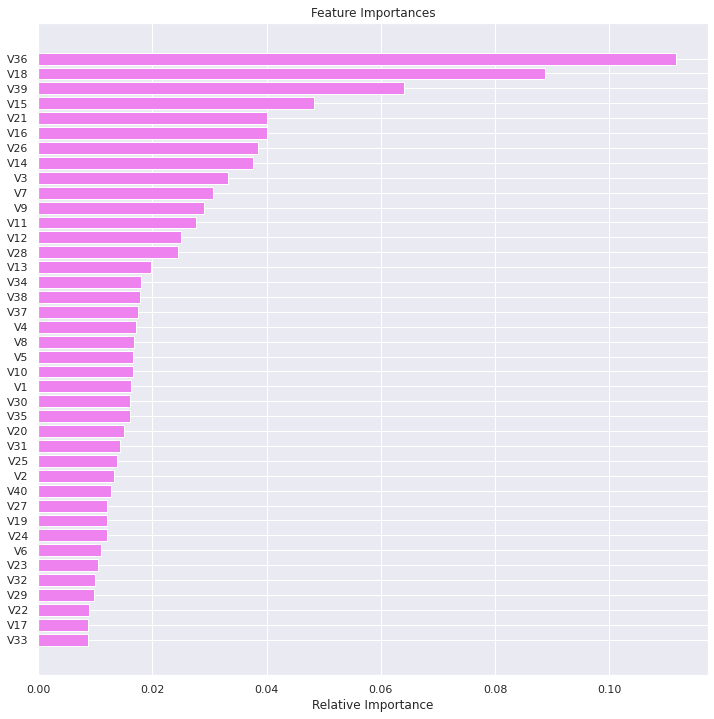

In [ ]:
# Checking feature importance on the choosen model

feature_names = X.columns
importances = rf_tuned_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- V38 is the most important feature, follwed by V18 and V39

##Building the Pipeline

In [ ]:
#building preprocessing step

preprocessor = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

In [ ]:
# separating the independent and dependent variables
X = train.drop(["Target"], axis=1)
Y = train["Target"]

In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(15000, 40) (5000, 40)


In [ ]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
          "rf",
          RandomForestClassifier(
          n_estimators= 300,
          min_samples_leaf= 1,
          max_features= 'sqrt',
          max_samples= 0.6
        ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train_over, y_train_over)

Pipeline(steps=[('pre',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='median'))])),
                ('rf',
                 RandomForestClassifier(max_features='sqrt', max_samples=0.6,
                                        n_estimators=300))])

In [ ]:
# Calculating different metrics on the test set
model_test_set = model_performance_classification_sklearn(model, X_test, y_test)
print("Test performance:")
model_test_set

Test performance:


,Accuracy,Recall,Precision,F1
0,0.997,0.968,0.982,0.975


The model is performing as expected in the test data

# Business Insights and Conclusions

- V38 is the most important feature, follwed by V18 and V39
- Bagging and Random Forest both tuned with RandomizedSearchCV and oversampled showed to be more robust kind of models to predict failure. But I choose Random Forest to deploy
- Failure are rare events that happens only in 5,5% of the records
- Our model is robust and can predict correctly 84% of the times it predicts failure
- Many idenpendent variable are correlated between themselves, none highly correlately to the dependent variable (that's I didn't go through logistic regression)
- Doing some further investigation into the correlations we can see some patterns in the concetration of failures in the scatterplots. Some in the edges of the distribution, others in some specific regions.


***